<a href="https://colab.research.google.com/github/li199959/one/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
  code by Tae Hwan Jung(Jeff Jung) @graykode, modify by wmathor
'''
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optimizer
import torch.utils.data as Data

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.FloatTensor

In [2]:
sentences = ["jack like dog", "jack like cat", "jack like animal",
  "dog cat animal", "banana apple cat dog like", "dog fish milk like",
  "dog cat animal like", "jack like apple", "apple like", "jack like banana",
  "apple banana jack movie book music like", "cat dog hate", "cat dog like"]
sentence_list = " ".join(sentences).split() # ['jack', 'like', 'dog']
vocab = list(set(sentence_list))
word2idx = {w:i for i, w in enumerate(vocab)}
vocab_size = len(vocab)

In [ ]:
vocab,sentence_list

In [5]:
# model parameters
C = 2 # window size
batch_size = 8
m = 2 # word embedding dim

In [8]:
skip_grams = []
for idx in range(C, len(sentence_list) - C):
  center = word2idx[sentence_list[idx]]
  context_idx = list(range(idx - C, idx)) + list(range(idx + 1, idx + C + 1))
  context = [word2idx[sentence_list[i]] for i in context_idx]

  for w in context:
    skip_grams.append([center, w])

In [ ]:
skip_grams

In [11]:
def make_data(skip_grams):
  input_data = []
  output_data = []
  for a, b in skip_grams:
    input_data.append(np.eye(vocab_size)[a])
    output_data.append(b)
  return input_data, output_data

In [12]:
input_data, output_data = make_data(skip_grams)
input_data, output_data = torch.Tensor(input_data), torch.LongTensor(output_data)
dataset = Data.TensorDataset(input_data, output_data)
loader = Data.DataLoader(dataset, batch_size, True)

In [13]:
class Word2Vec(nn.Module):
  def __init__(self):
    super(Word2Vec, self).__init__()
    self.W = nn.Parameter(torch.randn(vocab_size, m).type(dtype))
    self.V = nn.Parameter(torch.randn(m, vocab_size).type(dtype))

  def forward(self, X):
    # X : [batch_size, vocab_size]
    hidden = torch.mm(X, self.W) # [batch_size, m]
    output = torch.mm(hidden, self.V) # [batch_size, vocab_size]
    return output

In [14]:
model = Word2Vec().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optim = optimizer.Adam(model.parameters(), lr=1e-3)

In [15]:
for epoch in range(2000):
  for i, (batch_x, batch_y) in enumerate(loader):
    batch_x = batch_x.to(device)
    batch_y = batch_y.to(device)
    pred = model(batch_x)
    loss = loss_fn(pred, batch_y)

    if (epoch + 1) % 1000 == 0:
      print(epoch + 1, i, loss.item())
    
    optim.zero_grad()
    loss.backward()
    optim.step()

1000 0 1.8591241836547852
1000 1 1.7231096029281616
1000 2 1.862649917602539
1000 3 2.146965742111206
1000 4 2.3394856452941895
1000 5 2.3282558917999268
1000 6 1.758164644241333
1000 7 1.9932892322540283
1000 8 2.1684348583221436
1000 9 1.995636224746704
1000 10 2.2092084884643555
1000 11 1.8849002122879028
1000 12 2.5148348808288574
1000 13 2.021155834197998
1000 14 1.9384682178497314
1000 15 2.089881181716919
1000 16 2.045048952102661
1000 17 2.6188395023345947
1000 18 2.068634033203125
1000 19 2.1641101837158203
1000 20 2.5457701683044434
2000 0 2.2586536407470703
2000 1 2.530390977859497
2000 2 1.9795496463775635
2000 3 2.0344669818878174
2000 4 2.473395824432373
2000 5 2.225813627243042
2000 6 1.8515417575836182
2000 7 2.096681833267212
2000 8 2.4004125595092773
2000 9 1.8614320755004883
2000 10 1.9356491565704346
2000 11 1.73200261592865
2000 12 1.9844484329223633
2000 13 2.1806440353393555
2000 14 2.2129507064819336
2000 15 2.0590529441833496
2000 16 2.1668570041656494
2000 17 

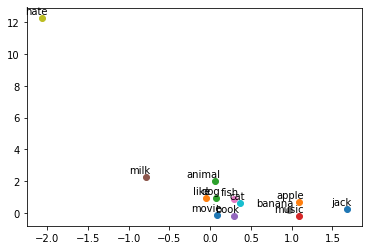

In [16]:
import matplotlib.pyplot as plt
for i, label in enumerate(vocab):
  W, WT = model.parameters()
  x,y = float(W[i][0]), float(W[i][1])
  plt.scatter(x, y)
  plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()